# How are the in-demand skills trending for Data Analysts?

## Methodology:

1. Aggregate monthly skill counts.
2. Analyse based on percentage of total jobs. Avoiding overall job market trends being shown in data set.
3. Plot the monthly skill demand for Data Analysts.

In [15]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_da_uk['job_posted_month_no'] = df_da_uk['job_posted_date'].dt.month

In [17]:
df_da_uk_exploded = df_da_uk.explode('job_skills')

In [18]:
df_da_uk_pivot = df_da_uk_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_da_uk_pivot.loc['Total'] = df_da_uk_pivot.sum()

df_da_uk_pivot = df_da_uk_pivot[df_da_uk_pivot.loc['Total'].sort_values(ascending=False).index]

df_da_uk_pivot = df_da_uk_pivot.drop('Total')



In [19]:
# Turn the count in the  above DF into a percentage of a skill appearing

df_da_totals = df_da_uk.groupby('job_posted_month_no').size() # this gives the total number of job postings to divide count of each skill by to get %

In [20]:
df_da_uk_percent = df_da_uk_pivot.div(df_da_totals/100, axis=0)

In [21]:
df_da_uk_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,selenium,flutter,fortran,redis,golang,ionic,kotlin,laravel,node,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,41.376960,39.604635,25.289707,18.132243,13.905930,9.611452,8.588957,4.976142,3.680982,5.316973,...,0.000000,0.068166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068166,0.000000
2,42.816365,45.575642,27.307326,17.031399,16.270219,8.658421,8.753568,6.184586,4.376784,4.281637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,42.275281,41.994382,24.438202,16.853933,16.432584,9.410112,7.303371,5.337079,5.898876,6.039326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,40.998217,40.463458,28.520499,16.042781,13.368984,8.377897,6.773619,5.704100,4.812834,6.951872,...,0.000000,0.000000,0.000000,0.178253,0.000000,0.178253,0.000000,0.000000,0.000000,0.000000
5,42.019544,40.553746,26.221498,15.635179,12.377850,8.631922,6.514658,5.863192,4.723127,4.397394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,38.315217,40.353261,24.592391,16.032609,12.907609,7.065217,4.891304,4.891304,5.027174,4.619565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,44.618834,44.170404,33.295964,22.645740,11.883408,10.874439,8.744395,12.443946,5.044843,9.417040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,42.622951,42.950820,28.032787,17.868852,13.770492,8.360656,5.901639,6.885246,6.393443,4.590164,...,0.000000,0.000000,0.163934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,44.784173,40.557554,28.597122,22.931655,18.525180,12.949640,7.374101,6.294964,5.485612,4.316547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089928,0.089928,0.000000,0.000000


In [22]:
df_da_uk_percent = df_da_uk_percent.reset_index()
df_da_uk_percent ['job_posted_month'] = df_da_uk_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_uk_percent = df_da_uk_percent.set_index('job_posted_month')
df_da_uk_percent = df_da_uk_percent.drop(columns='job_posted_month_no')

df_da_uk_percent


job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,selenium,flutter,fortran,redis,golang,ionic,kotlin,laravel,node,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,41.376960,39.604635,25.289707,18.132243,13.905930,9.611452,8.588957,4.976142,3.680982,5.316973,...,0.000000,0.068166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068166,0.000000
Feb,42.816365,45.575642,27.307326,17.031399,16.270219,8.658421,8.753568,6.184586,4.376784,4.281637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,42.275281,41.994382,24.438202,16.853933,16.432584,9.410112,7.303371,5.337079,5.898876,6.039326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,40.998217,40.463458,28.520499,16.042781,13.368984,8.377897,6.773619,5.704100,4.812834,6.951872,...,0.000000,0.000000,0.000000,0.178253,0.000000,0.178253,0.000000,0.000000,0.000000,0.000000
May,42.019544,40.553746,26.221498,15.635179,12.377850,8.631922,6.514658,5.863192,4.723127,4.397394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,38.315217,40.353261,24.592391,16.032609,12.907609,7.065217,4.891304,4.891304,5.027174,4.619565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,44.618834,44.170404,33.295964,22.645740,11.883408,10.874439,8.744395,12.443946,5.044843,9.417040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,42.622951,42.950820,28.032787,17.868852,13.770492,8.360656,5.901639,6.885246,6.393443,4.590164,...,0.000000,0.000000,0.163934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,44.784173,40.557554,28.597122,22.931655,18.525180,12.949640,7.374101,6.294964,5.485612,4.316547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089928,0.089928,0.000000,0.000000


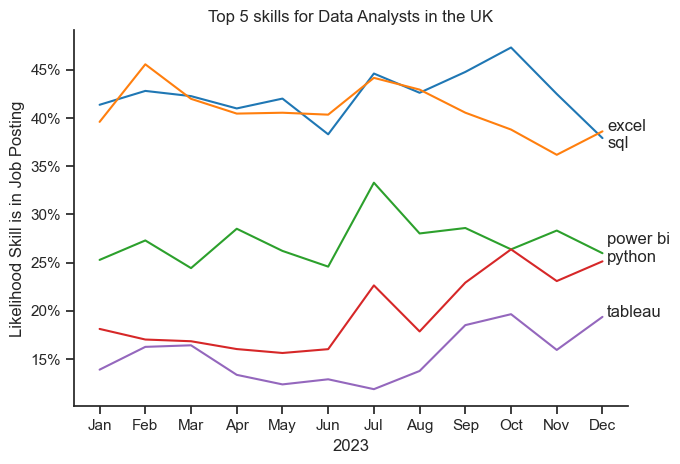

In [ ]:
df_plot = df_da_uk_percent.iloc[:,:5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Top 5 skills for Data Analysts in the UK')
plt.ylabel('Likelihood Skill is in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.tight_layout()



from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

offsets = [-1, 0.05, 1, -0.05, 0.02]
for i in range (5):
    y_val = df_plot.iloc[-1, i] + offsets[i]
    plt.text(11.1, y_val, df_plot.columns[i])
plt.show()


In [43]:
df_plot

job_skills,sql,excel,power bi,python,tableau
job_posted_month,,,,,
Jan,41.376960,39.604635,25.289707,18.132243,13.905930
Feb,42.816365,45.575642,27.307326,17.031399,16.270219
Mar,42.275281,41.994382,24.438202,16.853933,16.432584
Apr,40.998217,40.463458,28.520499,16.042781,13.368984
May,42.019544,40.553746,26.221498,15.635179,12.377850
Jun,38.315217,40.353261,24.592391,16.032609,12.907609
Jul,44.618834,44.170404,33.295964,22.645740,11.883408
Aug,42.622951,42.950820,28.032787,17.868852,13.770492
Sep,44.784173,40.557554,28.597122,22.931655,18.525180
